# Purpose

Compare simulated velocity field for a straight microfluidic channel for meshes generated by `cfmesh` with various mesh parameters to see how cfmesh parameters affect velocity accuracy. Compare straight microfluidic channels with 0&deg; and 45&deg; rotation.

# Geometry & Mesh

Channel:

- 0.2 mm long
- 0.1 mm wide

Mesh (obtained with STL ribbon file and `cfmesh`): 

- Start with 5 &mu;m mesh

# Cases

`U_max = 1.5 mm/s`

# Imports & code

In [1]:
from pathlib import Path
import re
from dataclasses import dataclass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def velocity_Poiseuille_2D(y_m, chan_width_m, velocity_max_m_per_s):
    normalized_y = y_m / chan_width_m
    return 4 * velocity_max_m_per_s * normalized_y * (1.0 - normalized_y)

def close_to_any(a, floats, **kwargs):
    # https://stackoverflow.com/questions/55239065/checking-if-a-specific-float-value-is-in-list-array-in-python-numpy
    return np.any(np.isclose(a, floats, **kwargs))


In [3]:
velocity_Poiseuille_2D(50e-6, 100e-6, 1.5e-3)

0.0015

# Preliminaries

In [4]:
u_max_mm_per_sec = 1.5

m_to_mm = 1e3
m_to_um = 1e6

# 0&deg; channel

## Read data file for x=0

In [5]:
cwd = Path(".").resolve()
cwd

PosixPath('/Users/nordin/Documents/Projects/2022_Projects/OpenFOAM/openfoam-data/my_cases/9_straight_channel_cfmesh/geometry_straight_channel_0deg/analysis')

In [6]:
dir_post_processing = (
    cwd.parent / 
    "mesh_1_cases" /
    "run_cases" /
    "velocity_field_case" /
    "postProcessing"
)
print(f"postProcessing directory exists?  {dir_post_processing.exists()}")

dir_sampleDict_lines = dir_post_processing / "sampleDict_lines"
print(f"sampleDict_lines directory exists?  {dir_sampleDict_lines.exists()}")

postProcessing directory exists?  True
sampleDict_lines directory exists?  True


In [7]:
line_scan_dirs = []
for d in dir_sampleDict_lines.glob("*"):
    if d.is_dir():
        line_scan_dirs.append(d)
        
line_scan_dirs = sorted(line_scan_dirs, key=lambda f: float(f.name))
line_scan_dirs

[PosixPath('/Users/nordin/Documents/Projects/2022_Projects/OpenFOAM/openfoam-data/my_cases/9_straight_channel_cfmesh/geometry_straight_channel_0deg/mesh_1_cases/run_cases/velocity_field_case/postProcessing/sampleDict_lines/0'),
 PosixPath('/Users/nordin/Documents/Projects/2022_Projects/OpenFOAM/openfoam-data/my_cases/9_straight_channel_cfmesh/geometry_straight_channel_0deg/mesh_1_cases/run_cases/velocity_field_case/postProcessing/sampleDict_lines/0.001'),
 PosixPath('/Users/nordin/Documents/Projects/2022_Projects/OpenFOAM/openfoam-data/my_cases/9_straight_channel_cfmesh/geometry_straight_channel_0deg/mesh_1_cases/run_cases/velocity_field_case/postProcessing/sampleDict_lines/0.002'),
 PosixPath('/Users/nordin/Documents/Projects/2022_Projects/OpenFOAM/openfoam-data/my_cases/9_straight_channel_cfmesh/geometry_straight_channel_0deg/mesh_1_cases/run_cases/velocity_field_case/postProcessing/sampleDict_lines/0.003'),
 PosixPath('/Users/nordin/Documents/Projects/2022_Projects/OpenFOAM/openfoam

### numpy loadtxt

In [8]:
temp = np.loadtxt(line_scan_dirs[-1] / "line_scan_x0_U.csv", delimiter=",", skiprows=1)
temp

array([[-5.00000e-05,  0.00000e+00,  0.00000e+00,  0.00000e+00],
       [-4.97996e-05,  1.19847e-05,  2.86994e-12,  1.30587e-28],
       [-4.95992e-05,  2.39695e-05,  5.73988e-12,  2.61174e-28],
       ...,
       [ 4.95992e-05,  2.39695e-05,  1.34278e-12, -1.15589e-27],
       [ 4.97996e-05,  1.19848e-05,  6.71391e-13, -5.77944e-28],
       [ 5.00000e-05,  0.00000e+00,  0.00000e+00,  0.00000e+00]])

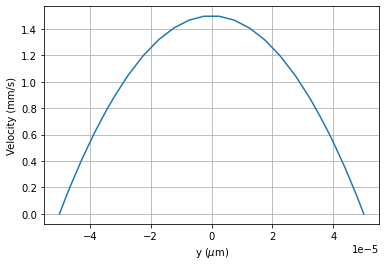

In [9]:
fig, ax = plt.subplots()
ax.plot(temp[:, 0], temp[:, 1] * m_to_mm)
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Velocity (mm/s)")
ax.grid()

### pandas read_csv

In [10]:
temp = pd.read_csv(line_scan_dirs[-1] / "line_scan_x0_U.csv")
temp["U_mag"] = np.sqrt(temp["U_0"]**2 + temp["U_1"]**2 + temp["U_2"]**2)
temp["U_mag_mm_per_s"] = temp["U_mag"] * m_to_mm
temp["y_um"] = temp["y"] * m_to_um
temp

,y,U_0,U_1,U_2,U_mag,U_mag_mm_per_s,y_um
0,-0.000050,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-50.0000
1,-0.000050,0.000012,2.869940e-12,1.305870e-28,0.000012,0.011985,-49.7996
2,-0.000050,0.000024,5.739880e-12,2.611740e-28,0.000024,0.023970,-49.5992
3,-0.000049,0.000036,8.609830e-12,3.917610e-28,0.000036,0.035954,-49.3988
4,-0.000049,0.000048,1.147980e-11,5.223480e-28,0.000048,0.047939,-49.1984
...,...,...,...,...,...,...,...
495,0.000049,0.000048,2.685560e-12,-2.311780e-27,0.000048,0.047939,49.1984
496,0.000049,0.000036,2.014170e-12,-1.733830e-27,0.000036,0.035954,49.3988
497,0.000050,0.000024,1.342780e-12,-1.155890e-27,0.000024,0.023970,49.5992
498,0.000050,0.000012,6.713910e-13,-5.779440e-28,0.000012,0.011985,49.7996


### Poiseuille velocity profile - 2D channel

In [11]:
temp["y"].iloc[-1] - temp["y"].iloc[0]

0.0001

In [12]:
v_P_mm_per_s = velocity_Poiseuille_2D(
            temp["y"] - temp["y"].iloc[0] , 
            temp["y"].iloc[-1] - temp["y"].iloc[0], 
            u_max_mm_per_sec * 1e-3
        ) * m_to_mm

v_P_mm_per_s

0      0.000000
1      0.012000
2      0.023952
3      0.035855
4      0.047710
         ...   
495    0.047710
496    0.035855
497    0.023952
498    0.012000
499    0.000000
Name: y, Length: 500, dtype: float64

In [13]:
temp["Relative Error"] = (v_P_mm_per_s - temp["U_mag_mm_per_s"]) / u_max_mm_per_sec

## Plots

### Velocity

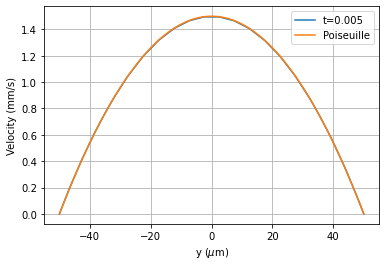

In [14]:
fig, ax = plt.subplots()
ax.plot(temp["y_um"], temp["U_mag_mm_per_s"], label="t=0.005")
ax.plot(temp["y_um"], v_P_mm_per_s, label="Poiseuille")
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Velocity (mm/s)")
ax.legend()
ax.grid()

### Relative error

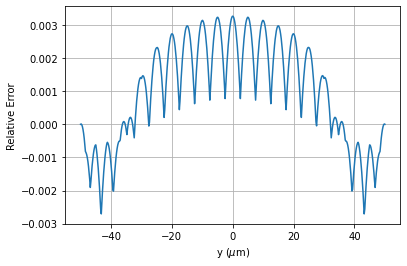

In [15]:
fig, ax = plt.subplots()
ax.plot(temp["y_um"], temp["Relative Error"])
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Relative Error")
ax.grid()

## Test save dataframe to csv file

In [16]:
temp.to_csv("temp.csv")

## Read all t=0.005 line scan data

In [17]:
filenames = {
    -40: "line_scan_xm40_U.csv",
    -25: "line_scan_xm25_U.csv",
    0: "line_scan_x0_U.csv",
    25: "line_scan_x25_U.csv",
    40: "line_scan_x40_U.csv",
}

data_t0p005 = dict()

for x, filename in filenames.items():
    file =  line_scan_dirs[-1] / filename
    data_t0p005[x] = pd.read_csv(file)
    data_t0p005[x]["U_mag"] = np.sqrt(data_t0p005[x]["U_0"]**2 + data_t0p005[x]["U_1"]**2 + data_t0p005[x]["U_2"]**2)
    data_t0p005[x]["U_mag_mm_per_s"] = data_t0p005[x]["U_mag"] * m_to_mm
    data_t0p005[x]["y_um"] = data_t0p005[x]["y"] * m_to_um
    data_t0p005[x]["Relative Error"] = (v_P_mm_per_s - data_t0p005[x]["U_mag_mm_per_s"]) / u_max_mm_per_sec
    


## Plots

### Velocity

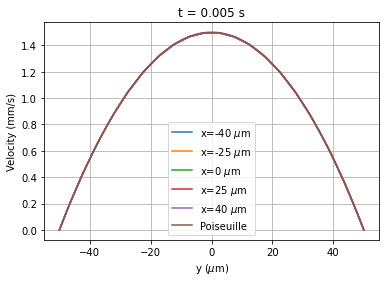

In [18]:
fig, ax = plt.subplots()

for x, temp in data_t0p005.items():
    ax.plot(temp["y_um"], temp["U_mag_mm_per_s"], label=f"x={x} $\mu$m")
ax.plot(temp["y_um"], v_P_mm_per_s, label="Poiseuille")
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Velocity (mm/s)")
ax.set_title("t = 0.005 s")
ax.legend()
ax.grid()

### Relative error

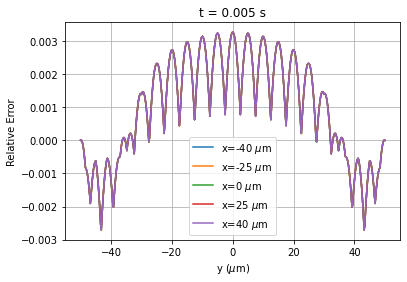

In [19]:
fig, ax = plt.subplots()

for x, temp in data_t0p005.items():
    ax.plot(temp["y_um"], temp["Relative Error"], label=f"x={x} $\mu$m")
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Relative Error")
ax.set_title("t = 0.005 s")
ax.legend()
ax.grid()

### Conclusion

Relative velocity error is about +/-0.3%, which is quite acceptable.

# 45&deg; channel

## Read data file

In [20]:
datafile_45deg = (
    Path.cwd().parents[1] /
    "geometry_straight_channel_45deg" /
    "mesh_1_cases" /
    "run_cases" /
    "velocity_field_case" /
    "postProcessing" /
    "sampleDict_lines" /
    "0.005" /
    "line_scan_x0_U.csv"
)
print(f"45deg data file exists?  {datafile_45deg.exists()}")

datafile_45deg

45deg data file exists?  True


PosixPath('/Users/nordin/Documents/Projects/2022_Projects/OpenFOAM/openfoam-data/my_cases/9_straight_channel_cfmesh/geometry_straight_channel_45deg/mesh_1_cases/run_cases/velocity_field_case/postProcessing/sampleDict_lines/0.005/line_scan_x0_U.csv')

In [21]:
temp45deg = pd.read_csv(line_scan_dirs[-1] / "line_scan_x0_U.csv")
temp45deg["U_mag"] = np.sqrt(temp45deg["U_0"]**2 + temp45deg["U_1"]**2 + temp45deg["U_2"]**2)
temp45deg["U_mag_mm_per_s"] = temp45deg["U_mag"] * m_to_mm
temp45deg["y_um"] = temp45deg["y"] * m_to_um
temp45deg["Relative Error"] = (v_P_mm_per_s - temp45deg["U_mag_mm_per_s"]) / u_max_mm_per_sec
temp45deg

,y,U_0,U_1,U_2,U_mag,U_mag_mm_per_s,y_um,Relative Error
0,-0.000050,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-50.0000,0.000000
1,-0.000050,0.000012,2.869940e-12,1.305870e-28,0.000012,0.011985,-49.7996,0.000010
2,-0.000050,0.000024,5.739880e-12,2.611740e-28,0.000024,0.023970,-49.5992,-0.000012
3,-0.000049,0.000036,8.609830e-12,3.917610e-28,0.000036,0.035954,-49.3988,-0.000066
4,-0.000049,0.000048,1.147980e-11,5.223480e-28,0.000048,0.047939,-49.1984,-0.000152
...,...,...,...,...,...,...,...,...
495,0.000049,0.000048,2.685560e-12,-2.311780e-27,0.000048,0.047939,49.1984,-0.000152
496,0.000049,0.000036,2.014170e-12,-1.733830e-27,0.000036,0.035954,49.3988,-0.000066
497,0.000050,0.000024,1.342780e-12,-1.155890e-27,0.000024,0.023970,49.5992,-0.000012
498,0.000050,0.000012,6.713910e-13,-5.779440e-28,0.000012,0.011985,49.7996,0.000010


## Plots

### Velocity

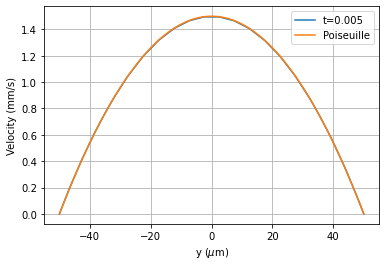

In [22]:
fig, ax = plt.subplots()
ax.plot(temp45deg["y_um"], temp45deg["U_mag_mm_per_s"], label="t=0.005")
ax.plot(temp45deg["y_um"], v_P_mm_per_s, label="Poiseuille")
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Velocity (mm/s)")
ax.legend()
ax.grid()

### Relative error

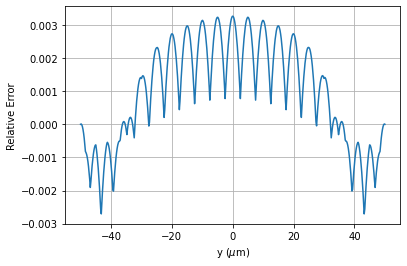

In [23]:
fig, ax = plt.subplots()
ax.plot(temp45deg["y_um"], temp45deg["Relative Error"])
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Relative Error")
ax.grid()

# Compare 0&deg; and 45&deg; channel velocities

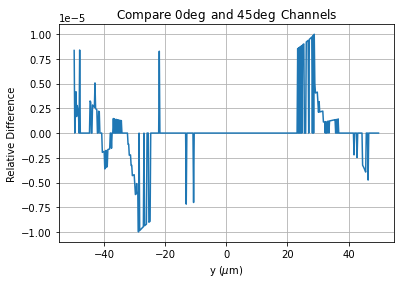

In [24]:
rel_diff_0deg_45deg_U_magn = (temp["U_mag_mm_per_s"] - temp45deg["U_mag_mm_per_s"]) / temp["U_mag_mm_per_s"]

fig, ax = plt.subplots()
ax.plot(temp45deg["y_um"], rel_diff_0deg_45deg_U_magn)
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Relative Difference")
ax.set_title("Compare 0$\deg$ and 45$\deg$ Channels")
ax.grid()

## Conclusion

The relative velocity difference is 10$^{-5}$ or less between the 0&deg; and 45&deg; rotated straight channel, which is great. 

# 0&deg; channel - x=0 different times &rarr; convergence

## Read data

In [32]:
filename = "line_scan_x0_U.csv"
data_x0_t_all = dict()

for temp_dir in line_scan_dirs:
    file =  temp_dir / filename
    t = float(file.parent.name)
    if t == 0.0:
        continue
    data_x0_t_all[t] = pd.read_csv(file)
    df = data_x0_t_all[t]
    df["U_mag"] = np.sqrt(df["U_0"]**2 + df["U_1"]**2 + df["U_2"]**2)
    df["U_mag_mm_per_s"] = df["U_mag"] * m_to_mm
    df["y_um"] = df["y"] * m_to_um
    df["Relative Error"] = (v_P_mm_per_s - df["U_mag_mm_per_s"]) / u_max_mm_per_sec


## Velocity

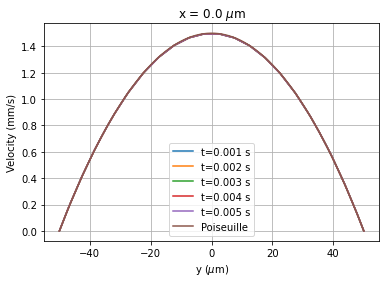

In [33]:
fig, ax = plt.subplots()

for t, temp in data_x0_t_all.items():
    ax.plot(temp["y_um"], temp["U_mag_mm_per_s"], label=f"t={t} s")
ax.plot(temp["y_um"], v_P_mm_per_s, label="Poiseuille")
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Velocity (mm/s)")
ax.set_title("x = 0.0 $\mu$m")
ax.legend()
ax.grid()

## Relative error

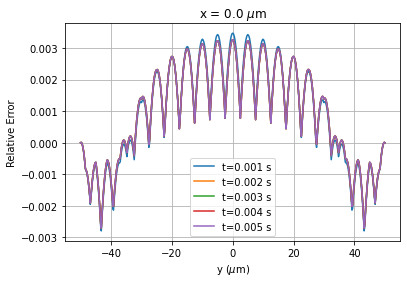

In [34]:
fig, ax = plt.subplots()

for t, temp in data_x0_t_all.items():
    ax.plot(temp["y_um"], temp["Relative Error"], label=f"t={t} s")
ax.set_xlabel("y ($\mu$m)")
ax.set_ylabel("Relative Error")
ax.set_title("x = 0.0 $\mu$m")
ax.legend()
ax.grid()

## Conclusion

There is essentially no change in the velocity field (at least at x = 0) by t= 0.002 s so I can stop the simulation at that time.

# Next

- Try different cfmesh parameters for different meshes.
- Do markdown summary file.
- Mesh my 4 inlet geometry and get velocity field.